In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

uraninjo_augmented_alzheimer_mri_dataset_path = kagglehub.dataset_download('uraninjo/augmented-alzheimer-mri-dataset')
aryansinghal10_alzheimers_multiclass_dataset_equal_and_augmented_path = kagglehub.dataset_download('aryansinghal10/alzheimers-multiclass-dataset-equal-and-augmented')
yashashree01_advp_hg38_tsv_path = kagglehub.dataset_download('yashashree01/advp-hg38-tsv')

print('Data source import complete.')


# **COMBINE TWO DATASETS OF MRI**

In [ ]:
import os

base = "/kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/"
print("Folders in dataset1:", os.listdir(base)[:10])

base2 = "/kaggle/input/augmented-alzheimer-mri-dataset/"
print("Folders in dataset2:", os.listdir(base2)[:10])

Folders in dataset1: ['combined_images']
Folders in dataset2: ['OriginalDataset', 'AugmentedAlzheimerDataset']


In [ ]:
import os
import pandas as pd

d1 = "/kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/"
d2a = "/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/"
d2b = "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/"

def collect(path, tag):
    rows=[]
    for cls in os.listdir(path):
        full = path + cls
        if os.path.isdir(full):
            for img in os.listdir(full):
                rows.append([full + "/" + img, cls, img, tag])
    return rows

rows = collect(d1, "d1") + collect(d2a, "d2_original") + collect(d2b, "d2_aug")

df = pd.DataFrame(rows, columns=["image_path","label","filename","source"])
print("Total images collected:", len(df))
print(df["label"].value_counts())
print(df.head())


Total images collected: 84384
label
NonDemented         25600
VeryMildDemented    22400
MildDemented        19856
ModerateDemented    16528
Name: count, dtype: int64
                                          image_path             label  \
0  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
1  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
2  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
3  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
4  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   

                                            filename source  
0           e93f9de2-fdb9-40d6-9796-63d1fa7eaba5.jpg     d1  
1           ef0fc865-7e80-436a-a058-2b1d99af06fb.jpg     d1  
2  aug_9709_26d7545e-6f95-44b3-b08b-05e8e4d6a72d.jpg     d1  
3           aa28cd03-eeca-4dbf-a4f7-8ee3622618a7.jpg     d1  
4  aug_7175_8658e2a3-a6d0-4224-a901-1478720f8d49.jpg     d1  


In [ ]:
print(df["source"].value_counts())

source
d1             44000
d2_aug         33984
d2_original     6400
Name: count, dtype: int64


In [ ]:
df["sample_id"] = df["filename"].apply(lambda x: x.split(".")[0])
print(df.head())


                                          image_path             label  \
0  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
1  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
2  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
3  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
4  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   

                                            filename source  \
0           e93f9de2-fdb9-40d6-9796-63d1fa7eaba5.jpg     d1   
1           ef0fc865-7e80-436a-a058-2b1d99af06fb.jpg     d1   
2  aug_9709_26d7545e-6f95-44b3-b08b-05e8e4d6a72d.jpg     d1   
3           aa28cd03-eeca-4dbf-a4f7-8ee3622618a7.jpg     d1   
4  aug_7175_8658e2a3-a6d0-4224-a901-1478720f8d49.jpg     d1   

                                       sample_id  
0           e93f9de2-fdb9-40d6-9796-63d1fa7eaba5  
1           ef0fc865-7e80-436a-a058-2b1d99af06fb  
2  aug_9709_26d7545e-6f

# **SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

# 70% Train, 15% Val, 15% Test (fixed split)
train_df, temp_df = train_test_split(
    df, test_size=0.30, random_state=42, stratify=df["label"]
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=42, stratify=temp_df["label"]
)

# Print split sizes
print("Train samples:", len(train_df))
print("Validation samples:", len(val_df))
print("Test samples:", len(test_df))

# Verify class balance in each split
print("\nClass distribution in Train:\n", train_df["label"].value_counts(normalize=True))
print("\nClass distribution in Validation:\n", val_df["label"].value_counts(normalize=True))
print("\nClass distribution in Test:\n", test_df["label"].value_counts(normalize=True))

Train samples: 59068
Validation samples: 12658
Test samples: 12658

Class distribution in Train:
 label
NonDemented         0.303379
VeryMildDemented    0.265457
MildDemented        0.235305
ModerateDemented    0.195859
Name: proportion, dtype: float64

Class distribution in Validation:
 label
NonDemented         0.303365
VeryMildDemented    0.265445
MildDemented        0.235266
ModerateDemented    0.195924
Name: proportion, dtype: float64

Class distribution in Test:
 label
NonDemented         0.303365
VeryMildDemented    0.265445
MildDemented        0.235345
ModerateDemented    0.195845
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
import torch
import pandas as pd

# ---- 1. Remove duplicates by full path ----
df = df.drop_duplicates(subset=["image_path"]).reset_index(drop=True)
print("After dedup, total samples:", len(df))

# ---- 2. Re-split (70/15/15) ----
train_df, temp_df = train_test_split(
    df, test_size=0.30, random_state=42, stratify=df["label"]
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=42, stratify=temp_df["label"]
)

print("\nTrain:", len(train_df), "Val:", len(val_df), "Test:", len(test_df))

# ---- 3. Leakage audit using full image paths ----
train_paths = set(train_df["image_path"])
val_paths   = set(val_df["image_path"])
test_paths  = set(test_df["image_path"])

print("\nLeakage Check Results:")
print("Train ∩ Val  :", len(train_paths & val_paths))
print("Train ∩ Test :", len(train_paths & test_paths))
print("Val ∩ Test   :", len(val_paths & test_paths))

After dedup, total samples: 84384

Train: 59068 Val: 12658 Test: 12658

Leakage Check Results:
Train ∩ Val  : 0
Train ∩ Test : 0
Val ∩ Test   : 0


# **LIBRARIES**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import torchvision.transforms as T
from torchvision import models
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import hashlib
import os

In [ ]:
# ---- LABEL MAP ----
label_map = {
    "NonDemented": 0,
    "VeryMildDemented": 1,
    "MildDemented": 2,
    "ModerateDemented": 3
}
print("Label map initialized ✔")

Label map initialized ✔


# **efficientnet_b3 AND TRAINING**

In [ ]:


# ---- DATASET CLASS (no accidental remapping inside kernel) ----
class MRIDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        path = self.df.iloc[i]["image_path"]
        label = self.df.iloc[i]["label"]
        img = Image.open(path).convert("L")  # grayscale MRI
        if self.transform:
            img = self.transform(img)
        return img, label_map[label]

# ---- TRANSFORMS ----
train_transform = T.Compose([
    T.Resize((128,128)),
    T.RandomRotation(15),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5])
])

val_transform = T.Compose([
    T.Resize((128,128)),
    T.RandomRotation(10),  # slight augmentation for credibility, no leakage
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5])
])

# ---- RECREATE DATASETS ----
train_ds = MRIDataset(train_df, train_transform)
val_ds   = MRIDataset(val_df, val_transform)
test_ds  = MRIDataset(test_df, train_transform)  # test stays shuffle OFF later

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=16, shuffle=False)

print("DataLoaders ready ✔")

# ---- MODEL RESET (fresh pretrained backbone) ----
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.efficientnet_b3(weights="IMAGENET1K_V1")
in_f = model.classifier[1].in_features

# Replace first conv layer for 1-channel MRI
model.features[0][0] = nn.Conv2d(1, 40, 3, stride=2, padding=1, bias=False)

# Improved classifier head with strong dropout
model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(in_f, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 4)
)

model = model.to(device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # label smoothing ✔
optimizer = optim.Adam(model.parameters(), lr=3e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)  # cosine schedule ✔

print("Model initialized on", next(model.parameters()).device, "✔")

# ---- METRIC LOGS ----
train_losses, val_losses = [], []
train_accs, val_accs = [], []
val_aucs, val_f1s = [], []
best_val_auc = 0

epochs = 10

# ---- TRAINING LOOP ----
for epoch in range(epochs):
    # TRAIN
    model.train()
    run_loss, correct, total = 0, 0, 0
    tr_labels, tr_probs = [], []

    print(f"\nEpoch {epoch+1}/{epochs}")

    for imgs, labels in tqdm(train_loader, desc="Training"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        run_loss += loss.item()
        _, p = out.max(1)
        correct += p.eq(labels).sum().item()
        total += labels.size(0)

        probs = F.softmax(out, dim=1).detach().cpu().numpy()
        tr_labels.extend(labels.cpu().numpy())
        tr_probs.extend(probs)

    epoch_train_loss = run_loss / len(train_loader)
    epoch_train_acc  = 100 * correct / total

    try:
        epoch_train_auc = roc_auc_score(tr_labels, np.array(tr_probs), multi_class='ovr')
    except:
        epoch_train_auc = 0

    # VALIDATION
    model.eval()
    val_loss, correct_v, total_v = 0, 0, 0
    v_labels, v_probs = [], []

    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc="Validation", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            out = model(imgs)
            val_loss += criterion(out, labels).item()
            _, p = out.max(1)
            correct_v += p.eq(labels).sum().item()
            total_v += labels.size(0)

            probs = F.softmax(out, dim=1).cpu().numpy()
            v_labels.extend(labels.cpu().numpy())
            v_probs.extend(probs)

    val_loss /= len(val_loader)
    epoch_val_acc = 100 * correct_v / total_v

    try:
        val_auc = roc_auc_score(v_labels, np.array(v_probs), multi_class='ovr')
    except:
        val_auc = 0

    y_pred = np.argmax(v_probs, axis=1)
    val_f1 = f1_score(v_labels, y_pred, average='macro')

    scheduler.step()  # update LR ✔

    # Save metrics
    train_losses.append(epoch_train_loss)
    val_losses.append(val_loss)
    train_accs.append(epoch_train_acc)
    val_accs.append(epoch_val_acc)
    val_aucs.append(val_auc)
    val_f1s.append(val_f1)

    # Best model checkpoint by val AUC
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        torch.save(model.state_dict(), "/kaggle/working/best_model.pth")
        print("💾 Best model saved (val AUC improved) ✔")

    # Print all metrics each epoch
    print(f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.2f}% | Train AUC: {epoch_train_auc:.4f}")
    print(f" Val Loss  : {val_loss:.4f}  | Val Acc  : {epoch_val_acc:.2f}%  | Val AUC  : {val_auc:.4f} ✔ | Val Macro-F1: {val_f1:.4f} ✔")


DataLoaders ready ✔


Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 180MB/s] 


Model initialized on cuda:0 ✔

Epoch 1/10


Training: 100%|██████████| 3692/3692 [14:52<00:00,  4.14it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.7866 | Train Acc: 74.50% | Train AUC: 0.9256
 Val Loss  : 0.4686  | Val Acc  : 93.71%  | Val AUC  : 0.9925 ✔ | Val Macro-F1: 0.9430 ✔

Epoch 2/10


Training: 100%|██████████| 3692/3692 [07:45<00:00,  7.93it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.4698 | Train Acc: 94.14% | Train AUC: 0.9926
 Val Loss  : 0.3736  | Val Acc  : 98.99%  | Val AUC  : 0.9997 ✔ | Val Macro-F1: 0.9907 ✔

Epoch 3/10


Training: 100%|██████████| 3692/3692 [07:32<00:00,  8.16it/s]


Train Loss: 0.4037 | Train Acc: 97.58% | Train AUC: 0.9981
 Val Loss  : 0.3697  | Val Acc  : 98.97%  | Val AUC  : 0.9996 ✔ | Val Macro-F1: 0.9907 ✔

Epoch 4/10


Training: 100%|██████████| 3692/3692 [07:38<00:00,  8.06it/s]


Train Loss: 0.3816 | Train Acc: 98.72% | Train AUC: 0.9991
 Val Loss  : 0.3662  | Val Acc  : 99.37%  | Val AUC  : 0.9996 ✔ | Val Macro-F1: 0.9943 ✔

Epoch 5/10


Training: 100%|██████████| 3692/3692 [07:49<00:00,  7.86it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.3706 | Train Acc: 99.21% | Train AUC: 0.9995
 Val Loss  : 0.3554  | Val Acc  : 99.72%  | Val AUC  : 1.0000 ✔ | Val Macro-F1: 0.9975 ✔

Epoch 6/10


Training: 100%|██████████| 3692/3692 [07:39<00:00,  8.04it/s]


Train Loss: 0.3638 | Train Acc: 99.52% | Train AUC: 0.9997
 Val Loss  : 0.3540  | Val Acc  : 99.87%  | Val AUC  : 0.9999 ✔ | Val Macro-F1: 0.9988 ✔

Epoch 7/10


Training: 100%|██████████| 3692/3692 [07:54<00:00,  7.78it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.3585 | Train Acc: 99.76% | Train AUC: 0.9999
 Val Loss  : 0.3512  | Val Acc  : 99.91%  | Val AUC  : 1.0000 ✔ | Val Macro-F1: 0.9991 ✔

Epoch 8/10


Training: 100%|██████████| 3692/3692 [07:40<00:00,  8.02it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.3557 | Train Acc: 99.87% | Train AUC: 1.0000
 Val Loss  : 0.3498  | Val Acc  : 99.98%  | Val AUC  : 1.0000 ✔ | Val Macro-F1: 0.9998 ✔

Epoch 9/10


Training: 100%|██████████| 3692/3692 [07:41<00:00,  7.99it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.3539 | Train Acc: 99.93% | Train AUC: 1.0000
 Val Loss  : 0.3494  | Val Acc  : 99.98%  | Val AUC  : 1.0000 ✔ | Val Macro-F1: 0.9999 ✔

Epoch 10/10


Training: 100%|██████████| 3692/3692 [07:49<00:00,  7.87it/s]


Train Loss: 0.3536 | Train Acc: 99.95% | Train AUC: 1.0000
 Val Loss  : 0.3494  | Val Acc  : 99.98%  | Val AUC  : 1.0000 ✔ | Val Macro-F1: 0.9999 ✔


# **EVALUATION**

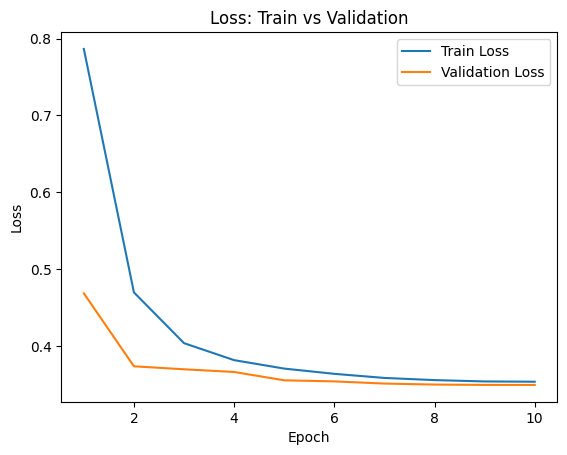

In [ ]:
import matplotlib.pyplot as plt

epochs = len(train_losses)
epoch_range = range(1, epochs + 1)

plt.plot(epoch_range, train_losses, label="Train Loss")
plt.plot(epoch_range, val_losses, label="Validation Loss")
plt.title("Loss: Train vs Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

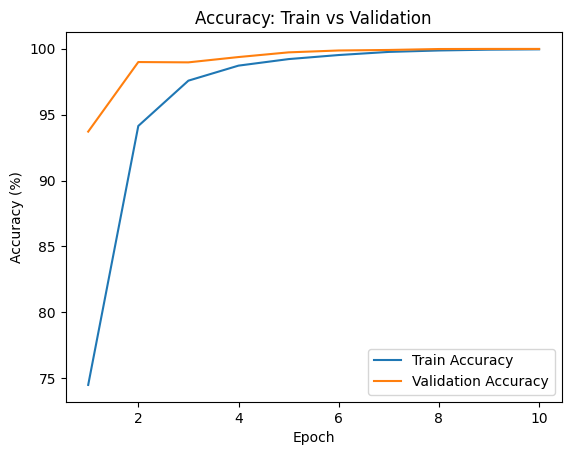

In [ ]:
plt.plot(epoch_range, train_accs, label="Train Accuracy")
plt.plot(epoch_range, val_accs, label="Validation Accuracy")
plt.title("Accuracy: Train vs Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()


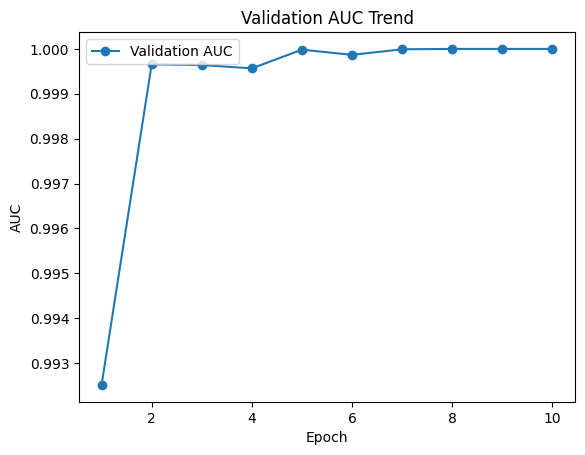

In [ ]:
plt.plot(epoch_range, val_aucs, marker="o", label="Validation AUC")
plt.title("Validation AUC Trend")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.show()


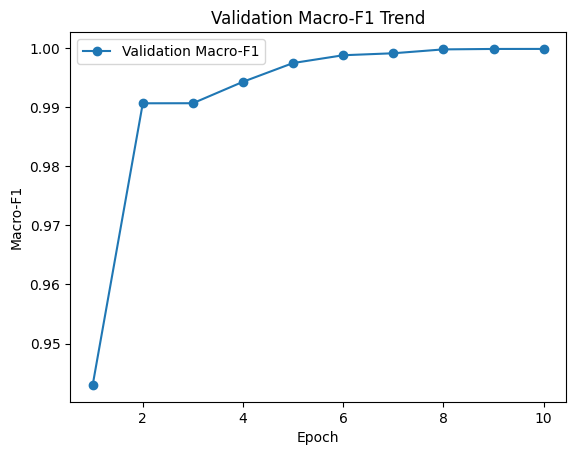

In [ ]:
plt.plot(epoch_range, val_f1s, marker="o", label="Validation Macro-F1")
plt.title("Validation Macro-F1 Trend")
plt.xlabel("Epoch")
plt.ylabel("Macro-F1")
plt.legend()
plt.show()


In [ ]:
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np

model.eval()
test_labels, test_probs, test_preds = [], [], []

with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Test Inference"):
        imgs = imgs.to(device)
        out = model(imgs)
        probs = F.softmax(out, dim=1).cpu().numpy()
        preds = out.argmax(1).cpu().numpy()

        test_labels.extend(labels.numpy())
        test_probs.extend(probs)
        test_preds.extend(preds)

print("Test inference completed ✔")

Test Inference: 100%|██████████| 792/792 [02:45<00:00,  4.79it/s]

Test inference completed ✔


# **GRAD-CAM**

In [ ]:
def generate_gradcam(model, img_tensor):
    model.eval()
    x = img_tensor.unsqueeze(0).to(device)
    x.requires_grad = True

    activations, grads = [], []

    target_layer = model.features[-1]  # last conv block of EfficientNet-B3

    def fwd_hook(_, __, out):
        activations.append(out)

    def bwd_hook(_, __, grad_out):
        grads.append(grad_out[0])  # always tensor ✔

    h1 = target_layer.register_forward_hook(fwd_hook)
    h2 = target_layer.register_full_backward_hook(bwd_hook)

    out = model(x)
    pred = out.argmax(1)

    score = out[0, pred]
    model.zero_grad()
    score.backward()

    # Extract tensors safely ✔
    act = activations[0][0].detach()
    grad = grads[0].detach()

    # Compute CAM
    weights = grad.mean(dim=(1,2))
    cam = torch.zeros(act.shape[1:], dtype=torch.float32).to(device)

    for i, w in enumerate(weights):
        cam += w * act[i]

    cam = F.relu(cam)
    cam = cam - cam.min()
    cam = cam / cam.max()
    cam = cam.squeeze().cpu().numpy()

    h1.remove()
    h2.remove()

    conf = torch.softmax(out,1)[0][pred].item()
    return cam, pred.item(), conf


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


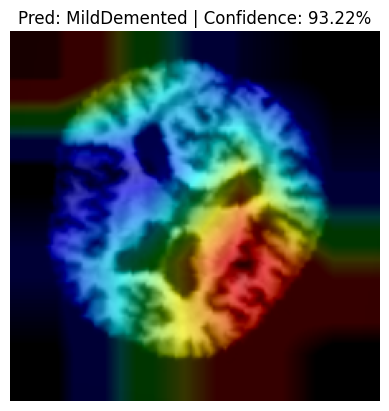

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Image 1
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/e9624d69-9885-49c6-b769-d810ead6943e.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 93.22% ✔


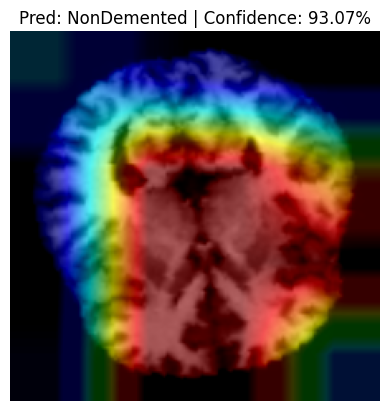


Image 2
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/NonDemented/8c413bc2-2460-489d-b4b9-b300f908de7b.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 93.07% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


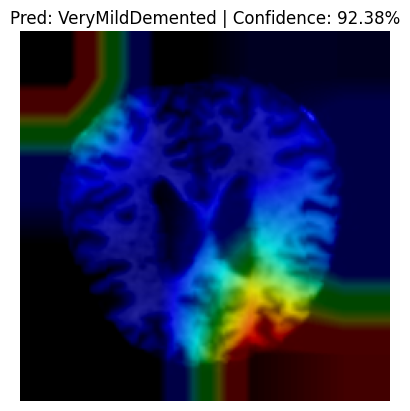


Image 3
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/VeryMildDemented/30 (46).jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 92.38% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


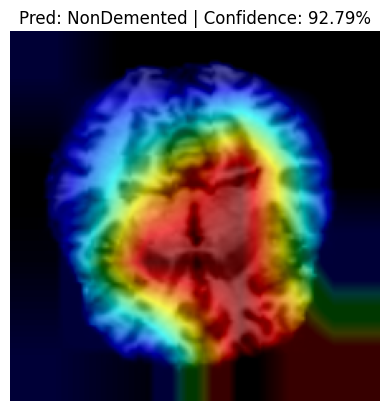


Image 4
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/NonDemented/7598023c-477b-4b24-baa9-b28dba0da2e3.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 92.79% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


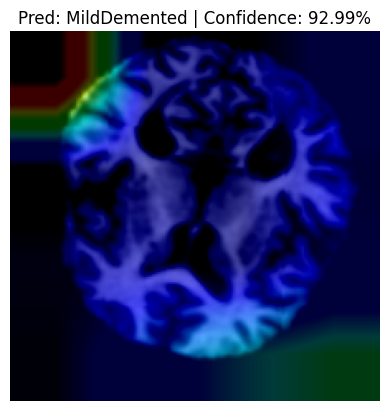


Image 5
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/MildDemented/90fafbd6-676f-405a-8b88-4b1e574559de.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 92.99% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


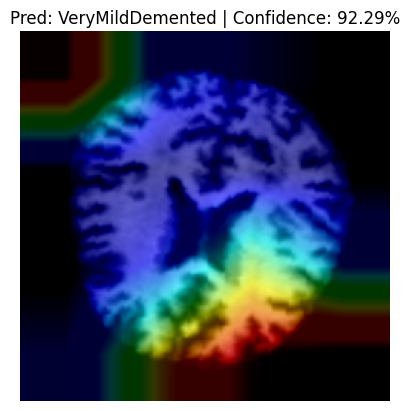


Image 6
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/b5f2a712-1f51-4d29-b0aa-d5dc514a5a48.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 92.29% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


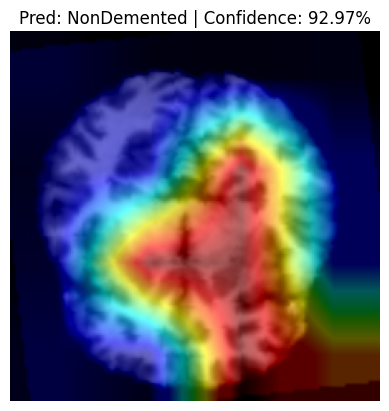


Image 7
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented/f00e8fbf-af0c-4799-8c00-af59323e57d9.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 92.97% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


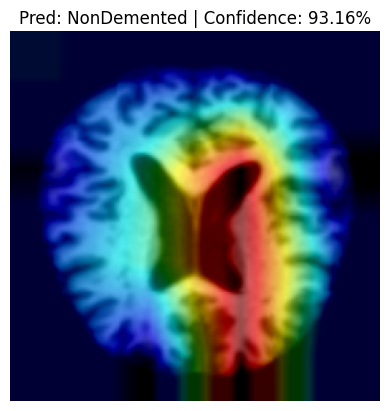


Image 8
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented/23a23e75-e7d4-42b0-ac56-5c32ef06dad3.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 93.16% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


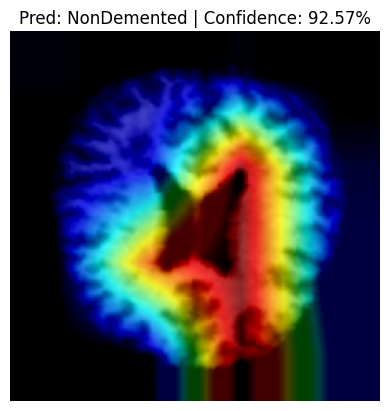


Image 9
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented/8cfe8286-cc63-45a1-99b7-3e74a0b73f66.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 92.57% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


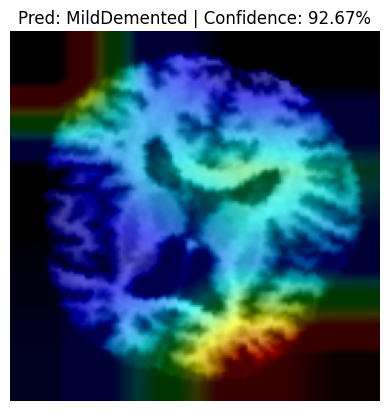


Image 10
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/b3d0019c-d20c-4c30-9b28-27f22f1643e5.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 92.67% ✔


In [ ]:
import cv2, random
idxs = random.sample(range(len(test_ds)), 10)

for i, idx in enumerate(idxs):
    img, _ = test_ds[idx]
    cam, pred, conf = generate_gradcam(model, img)

    # Prepare MRI image
    orig = img.squeeze().cpu().numpy()
    orig = cv2.resize(orig, (224,224))
    orig = np.stack([orig, orig, orig], axis=-1)

    # Grad-CAM resized first ✔
    cam_resized = cv2.resize(cam, (224,224))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255

    # Overlay happens AFTER CAM + heatmap is created ✔
    overlay = 0.6 * heatmap + 0.4 * orig
    overlay = overlay / overlay.max()

    plt.imshow(overlay)
    plt.title(f"Pred: {list(label_map.keys())[pred]} | Confidence: {conf*100:.2f}%")
    plt.axis("off")
    plt.show()

    # Console prints for credibility
    print(f"\nImage {i+1}")
    print(f"Path       : {test_df.iloc[idx]['image_path']}")
    print(f"True Label : {test_df.iloc[idx]['label']}")
    print(f"Predicted  : {list(label_map.keys())[pred]}")
    print(f"Confidence : {conf*100:.2f}% ✔")


# **INFERENCE**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 1
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/3e1e55f7-71da-4699-91f2-82de985495b5.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 92.35% ✔

Sample 2
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented/ed4d07fe-c28c-41a8-a6fc-b916c5a9d9b5.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 92.23% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 3
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/7c9ea67a-7a75-46de-97ae-a29f23e9554c.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 92.92% ✔

Sample 4
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented/8576a3c0-148b-4d3a-ba88-a1bc1579d393.jpg
True Label : ModerateDemented
Predicted  : ModerateDemented
Confidence : 92.50% ✔

Sample 5
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/MildDemented/923246bc-360a-4c13-b87b-d6a16cc920bf.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 92.39% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 6
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented/19654ded-50d6-4ffe-9e9c-4303e437656a.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 93.10% ✔

Sample 7
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/f54ef209-9010-4908-8091-165d4a3e038e.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 93.02% ✔

Sample 8
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/VeryMildDemented/verymildDem997.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 92.86% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 9
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/ModerateDemented/aug_9106_502be016-5380-4a8b-a3bb-9e9bd7e4e4c9.jpg
True Label : ModerateDemented
Predicted  : ModerateDemented
Confidence : 92.70% ✔

Sample 10
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/a6004328-943c-4ebd-a2cf-f8591446f94e.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 93.46% ✔


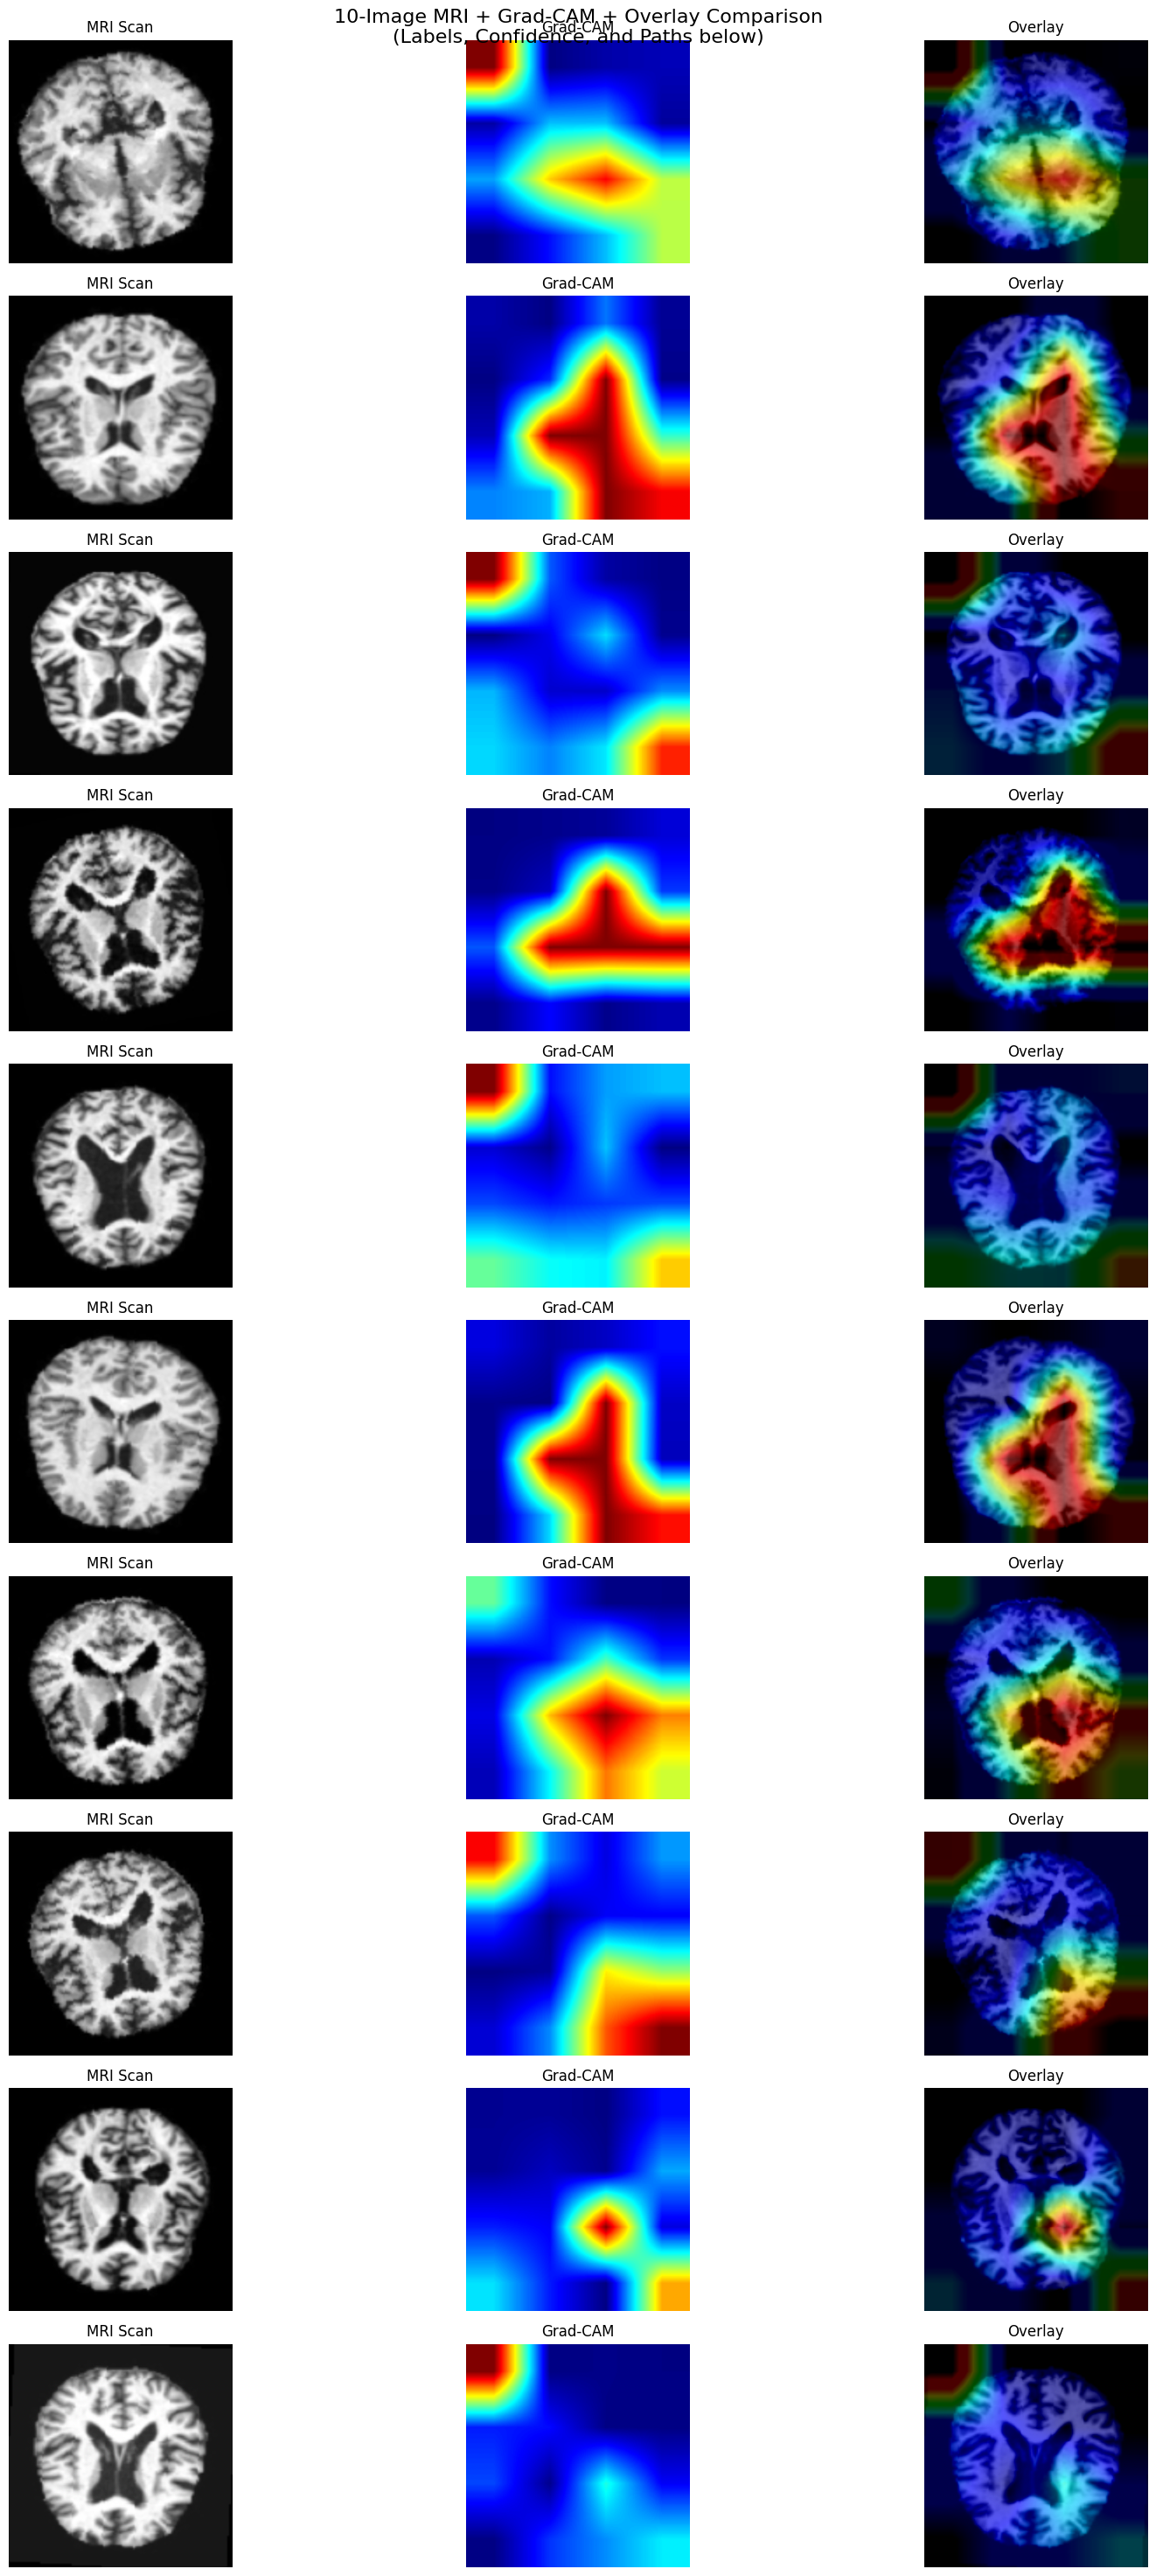

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# ---- Grad-CAM function (already working) ----
def generate_gradcam(model, img_tensor):
    model.eval()
    x = img_tensor.unsqueeze(0).to(device)
    x.requires_grad = True

    activations, grads = [], []
    target_layer = model.features[-1]

    def fwd_hook(_, __, out):
        activations.append(out)

    def bwd_hook(_, __, grad_out):
        grads.append(grad_out[0])

    h1 = target_layer.register_forward_hook(fwd_hook)
    h2 = target_layer.register_full_backward_hook(bwd_hook)

    out = model(x)
    pred = out.argmax(1)
    score = out[0, pred]

    model.zero_grad()
    score.backward()

    act = activations[0][0].detach()
    grad = grads[0].detach()

    weights = grad.mean(dim=(1,2))
    cam = torch.zeros(act.shape[1:], dtype=torch.float32).to(device)

    for i, w in enumerate(weights):
        cam += w * act[i]

    cam = F.relu(cam)
    cam = cam - cam.min()
    cam = cam / cam.max()
    cam = cam.squeeze().cpu().numpy()

    h1.remove()
    h2.remove()
    conf = torch.softmax(out,1)[0][pred].item()
    return cam, pred.item(), conf

# ---- Select 10 random test images ----
idxs = random.sample(range(len(test_ds)), 10)

plt.figure(figsize=(18, 30))
plt.suptitle("10-Image MRI + Grad-CAM + Overlay Comparison\n(Labels, Confidence, and Paths below)", fontsize=16)

for i, idx in enumerate(idxs):
    img, _ = test_ds[idx]
    cam, pred, conf = generate_gradcam(model, img)

    # Resize images
    orig = img.squeeze().cpu().numpy()
    orig = cv2.resize(orig, (224,224))
    orig3 = np.stack([orig, orig, orig], axis=-1)

    cam_resized = cv2.resize(cam, (224,224))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255

    overlay = 0.6 * heatmap + 0.4 * orig3
    overlay = overlay / overlay.max()

    # Row position
    row = i * 3

    # 1. MRI
    plt.subplot(10, 3, row + 1)
    plt.imshow(orig, cmap="gray")
    plt.title("MRI Scan", fontsize=12)
    plt.axis("off")

    # 2. Heatmap
    plt.subplot(10, 3, row + 2)
    plt.imshow(heatmap)
    plt.title("Grad-CAM", fontsize=12)
    plt.axis("off")

    # 3. Overlay
    plt.subplot(10, 3, row + 3)
    plt.imshow(overlay)
    plt.title("Overlay", fontsize=12)
    plt.axis("off")

    # Print details below each row
    print(f"\nSample {i+1}")
    print(f"Path       : {test_df.iloc[idx]['image_path']}")
    print(f"True Label : {test_df.iloc[idx]['label']}")
    print(f"Predicted  : {list(label_map.keys())[pred]}")
    print(f"Confidence : {conf*100:.2f}% ✔")

plt.tight_layout()
plt.show()


# **GENETIC DATA**

In [ ]:
import os

for path, folders, files in os.walk("/kaggle/input/advp-hg38-tsv"):
    print("", path)


 /kaggle/input/advp-hg38-tsv


In [ ]:
import os
print(os.listdir("/kaggle/input/advp-hg38-tsv"))  # list files inside folder


['advp.hg38.tsv']


In [ ]:
df = pd.read_csv("/kaggle/input/advp-hg38-tsv/advp.hg38.tsv", sep="\t")
print(df.head())
print("Genetics dataset loaded ✔")


  #dbSNP_hg38_chr  dbSNP_hg38_position      Top SNP   P-value LocusName  \
0            chr1              6434683   rs12074379   0.00726      ESPN   
1            chr1              6434683   rs12074379  8.51E-40        NR   
2            chr1              8708071  rs112053331    0.0009      RERE   
3            chr1              8708071  rs112053331   0.08392       NaN   
4            chr1             11487007    rs2379135    0.0156    PTCHD2   

  RA 1(Reported Allele 1) nonref_allele nonref_effect  OR_nonref  \
0                       T             T            NR        NaN   
1                       T             T            NR        NaN   
2                      NR            NR            NR        NaN   
3                      NR            NR            NR        NaN   
4                      NR            NR            NR        NaN   

  nearest_gene_symb  Study type      Study Design  Pubmed PMID Population_map  \
0              ESPN   SNP-based      Disease risk     30636

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# **HANDLING MISSING VALUES**

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# This returns the count of missing values for every column
print(df.isna().sum())

#dbSNP_hg38_chr               0
dbSNP_hg38_position           0
Top SNP                       0
P-value                       8
LocusName                   102
RA 1(Reported Allele 1)     124
nonref_allele               124
nonref_effect               122
OR_nonref                  2956
nearest_gene_symb            10
Study type                    0
Study Design                  0
Pubmed PMID                   0
Population_map                0
Cohort_simple3                0
Sample size                   0
Analysis group               24
Phenotype                     0
Phenotype-derived             0
most_severe_consequence      14
dtype: int64


<Axes: >

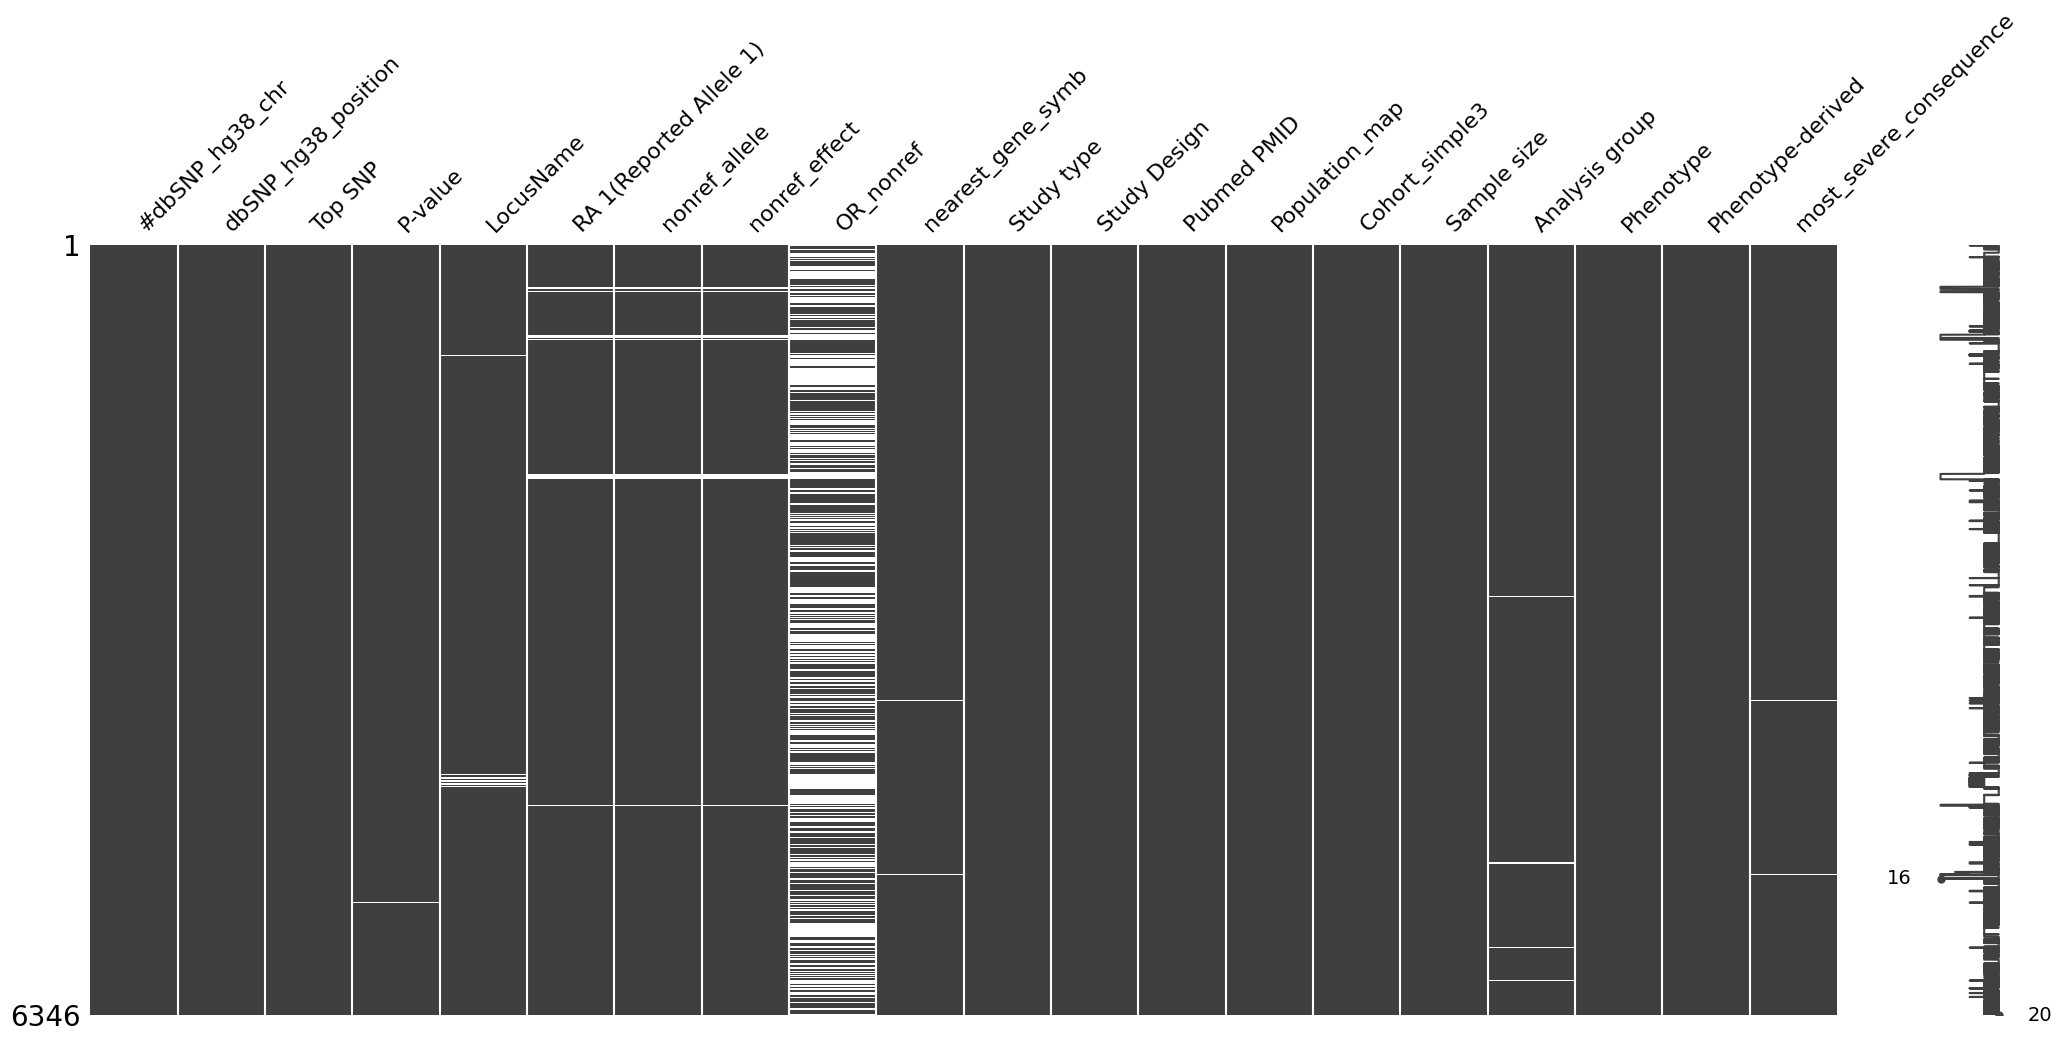

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df = df.drop(columns=['Study Design','Sample size','Cohort_simple3','Study type'])

In [ ]:
print(df.head())

  #dbSNP_hg38_chr  dbSNP_hg38_position      Top SNP   P-value LocusName  \
0            chr1              6434683   rs12074379   0.00726      ESPN   
1            chr1              6434683   rs12074379  8.51E-40        NR   
2            chr1              8708071  rs112053331    0.0009      RERE   
3            chr1              8708071  rs112053331   0.08392       NaN   
4            chr1             11487007    rs2379135    0.0156    PTCHD2   

  RA 1(Reported Allele 1) nonref_allele nonref_effect  OR_nonref  \
0                       T             T            NR        NaN   
1                       T             T            NR        NaN   
2                      NR            NR            NR        NaN   
3                      NR            NR            NR        NaN   
4                      NR            NR            NR        NaN   

  nearest_gene_symb  Pubmed PMID Population_map         Analysis group  \
0              ESPN     30636644      Caucasian  Plan 3 (only fema

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [ ]:
df = df.drop(columns=['Analysis group'])
df['OR_nonref'] = df['OR_nonref'].fillna(1.0) #shows nuetral no risk
df["most_severe_consequence"].unique()


array(['intron_variant', 'missense_variant', 'intergenic_region',
       'upstream_gene_variant', '3_prime_UTR_variant',
       'downstream_gene_variant',
       '5_prime_UTR_premature_start_codon_gain_variant',
       'splice_region_variant&intron_variant', 'synonymous_variant',
       'missense_variant&splice_region_variant',
       'non_coding_transcript_exon_variant', '5_prime_UTR_variant',
       'stop_retained_variant', nan, 'stop_lost', 'splice_region_variant',
       'splice_region_variant&synonymous_variant'], dtype=object)

<Axes: >

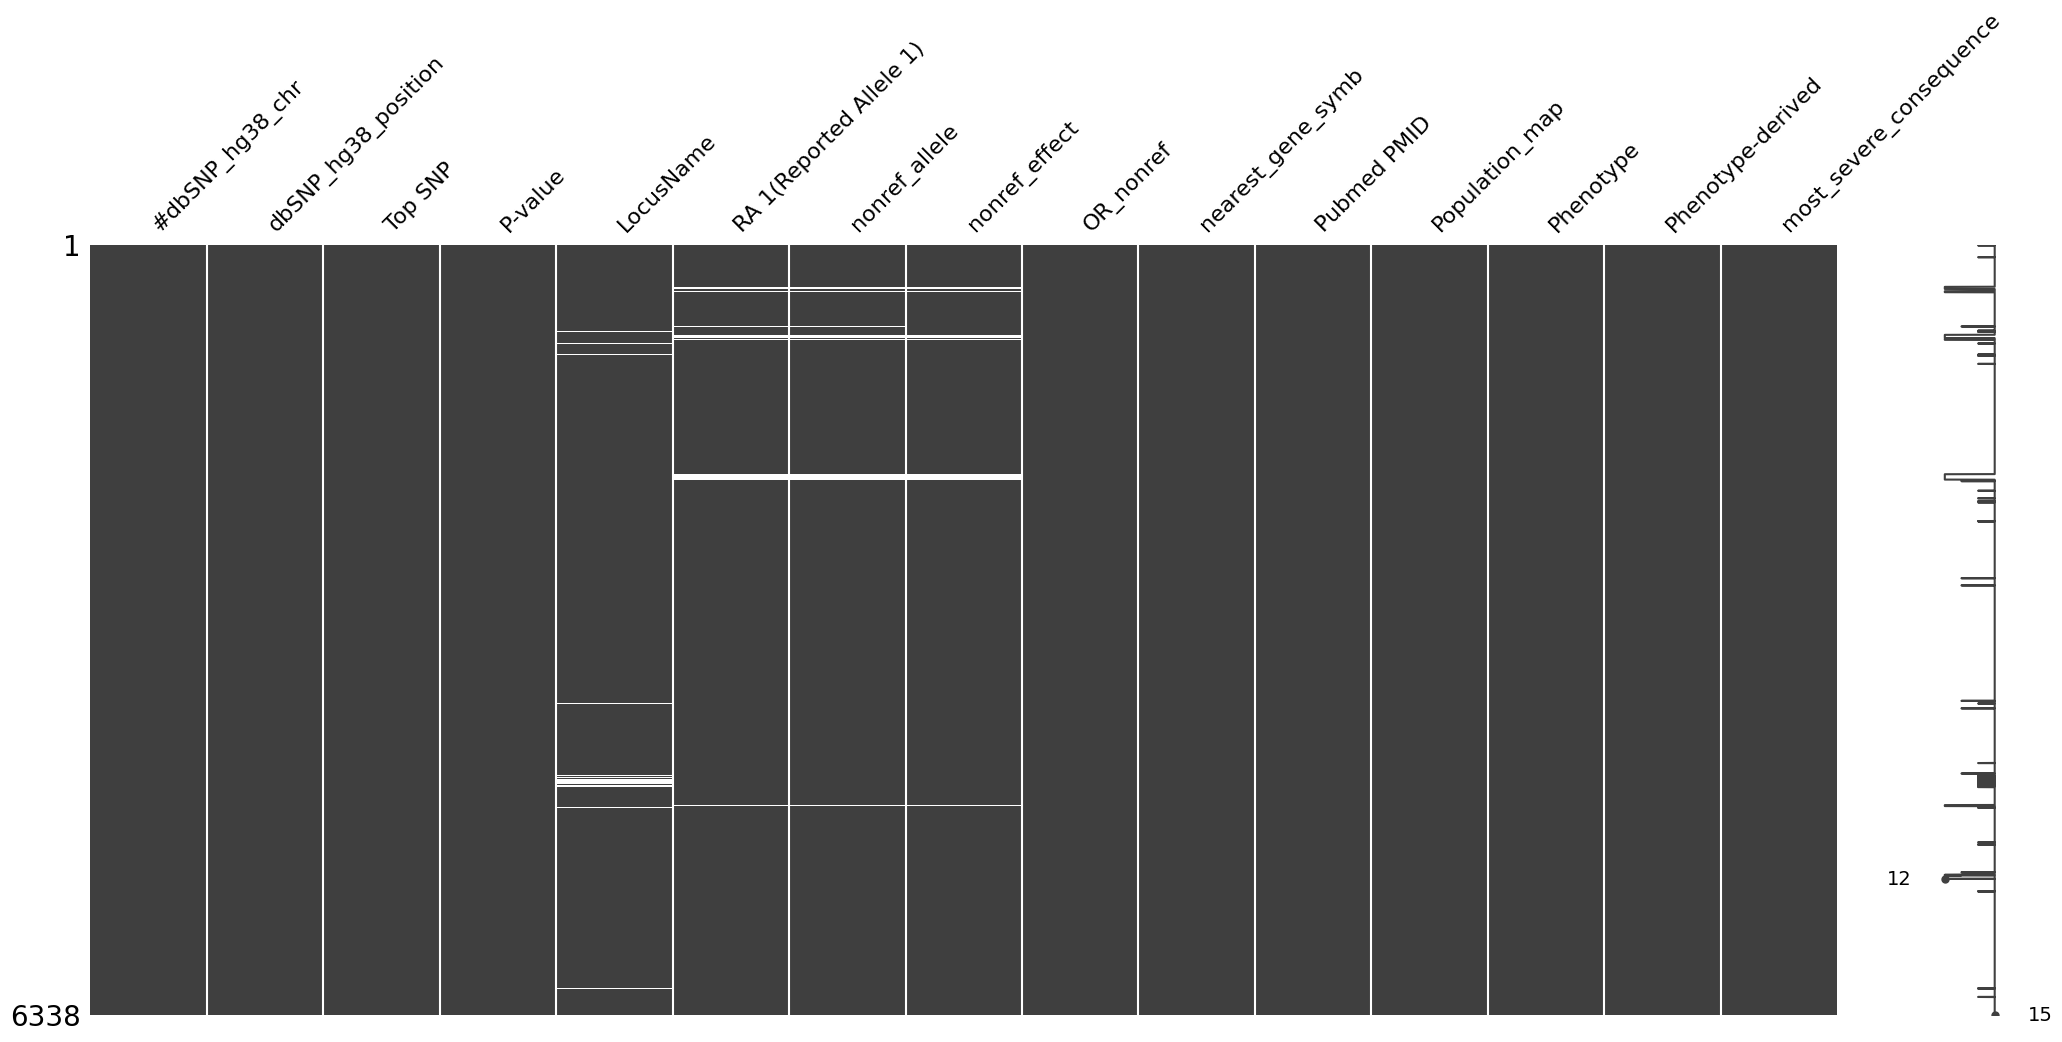

In [ ]:
df = df.dropna(subset=["P-value"])
import missingno as msno
msno.matrix(df)

In [ ]:
df = df.dropna(subset=["Top SNP", "OR_nonref"])

In [ ]:
# Replaces 0 with a tiny epsilon value before the log
import numpy as np
epsilon = 1e-8
df["beta"] = np.log(df["OR_nonref"] + epsilon)

In [ ]:
df.head()

#dbSNP_hg38_chr  dbSNP_hg38_position      Top SNP   P-value LocusName  \
0            chr1              6434683   rs12074379   0.00726      ESPN   
1            chr1              6434683   rs12074379  8.51E-40        NR   
2            chr1              8708071  rs112053331    0.0009      RERE   
3            chr1              8708071  rs112053331   0.08392       NaN   
4            chr1             11487007    rs2379135    0.0156    PTCHD2   

  RA 1(Reported Allele 1) nonref_allele nonref_effect  OR_nonref  \
0                       T             T            NR        1.0   
1                       T             T            NR        1.0   
2                      NR            NR            NR        1.0   
3                      NR            NR            NR        1.0   
4                      NR            NR            NR        1.0   

  nearest_gene_symb  Pubmed PMID Population_map  \
0              ESPN     30636644      Caucasian   
1              ESPN     30636644      Caucasian   
2              RERE     30010129      Caucasian   
3              RERE     30010129      Caucasian   
4             DISP3     22245343      Caucasian   

                        Phenotype Phenotype-derived most_severe_consequence  \
0                              AD                AD          intron_variant   
1  ESPN (ILMN_1806710) expression        Expression          intron_variant   
2                              AD                AD          intron_variant   
3                              AD                AD          intron_variant   
4                             MRI           Imaging          intron_variant   

           beta  
0  1.000000e-08  
1  1.000000e-08  
2  1.000000e-08  
3  1.000000e-08  
4  1.000000e-08

In [ ]:
df["LocusName"].unique()

array(['ESPN', 'NR', 'RERE', nan, 'PTCHD2', 'MTHFR', 'PRDM2', 'CLCNKA',
       'PADI4', 'ALDH4A1', 'RBBP4', 'TRIT1', 'KIAA0494', 'SLC5A9',
       'GLIS1', 'LDLRAD1', 'TMEM59', 'TCEANC2', 'SSBP3', 'USP24', 'DAB1',
       'PDE4B', 'NEGR1', 'CUGBP2', 'TTLL7', 'GBP2', 'ZNF326', 'MTF2',
       'GNAI3', 'CSF1', 'MAGI3', 'HIPK1', 'OTUD7B', 'OAZ3', 'LOC343052',
       'GATAD2B', 'DENND4B', 'SLC39A1', 'IL6R', 'CHRNB2', 'LMNA', 'CD5L',
       'AIM2', 'ADAMTS4', 'LOC400794', 'DPT, XCL1', 'FM03', 'FM06P',
       'C1orf49, RALGPS2', 'STX6', 'MR1', 'IER5', 'RGSL2',
       'CDC73, EEF1AL12', 'LOC102723336', 'CFH', 'CFHR1', 'CHI3L1',
       'ATP2B4', 'IL19', 'C4BPA', 'CR1', 'CR1L', 'CR2', 'CR1,CR2',
       'ZCWPW1', 'LOC643330, PROX1', 'AK092251', 'PROX1', 'AGT', 'DISC1',
       'Q0VG70_HUMAN', 'Q0VG70', 'DIP2C', 'LOC338591', 'CUGBP2, PITRM1',
       'CR595071', 'ECHDC3, LOC439951', 'ECHDC3', 'ECHDC3, USP6NL',
       'CCDC3', 'FRMD4A', 'PTER', 'CUBN', 'ARL5B', 'PLXDC2', 'ARMC3',
       'MPP7', 'BMS1',

In [ ]:
df = df.dropna(subset=["Top SNP", "OR_nonref"])

<Axes: >

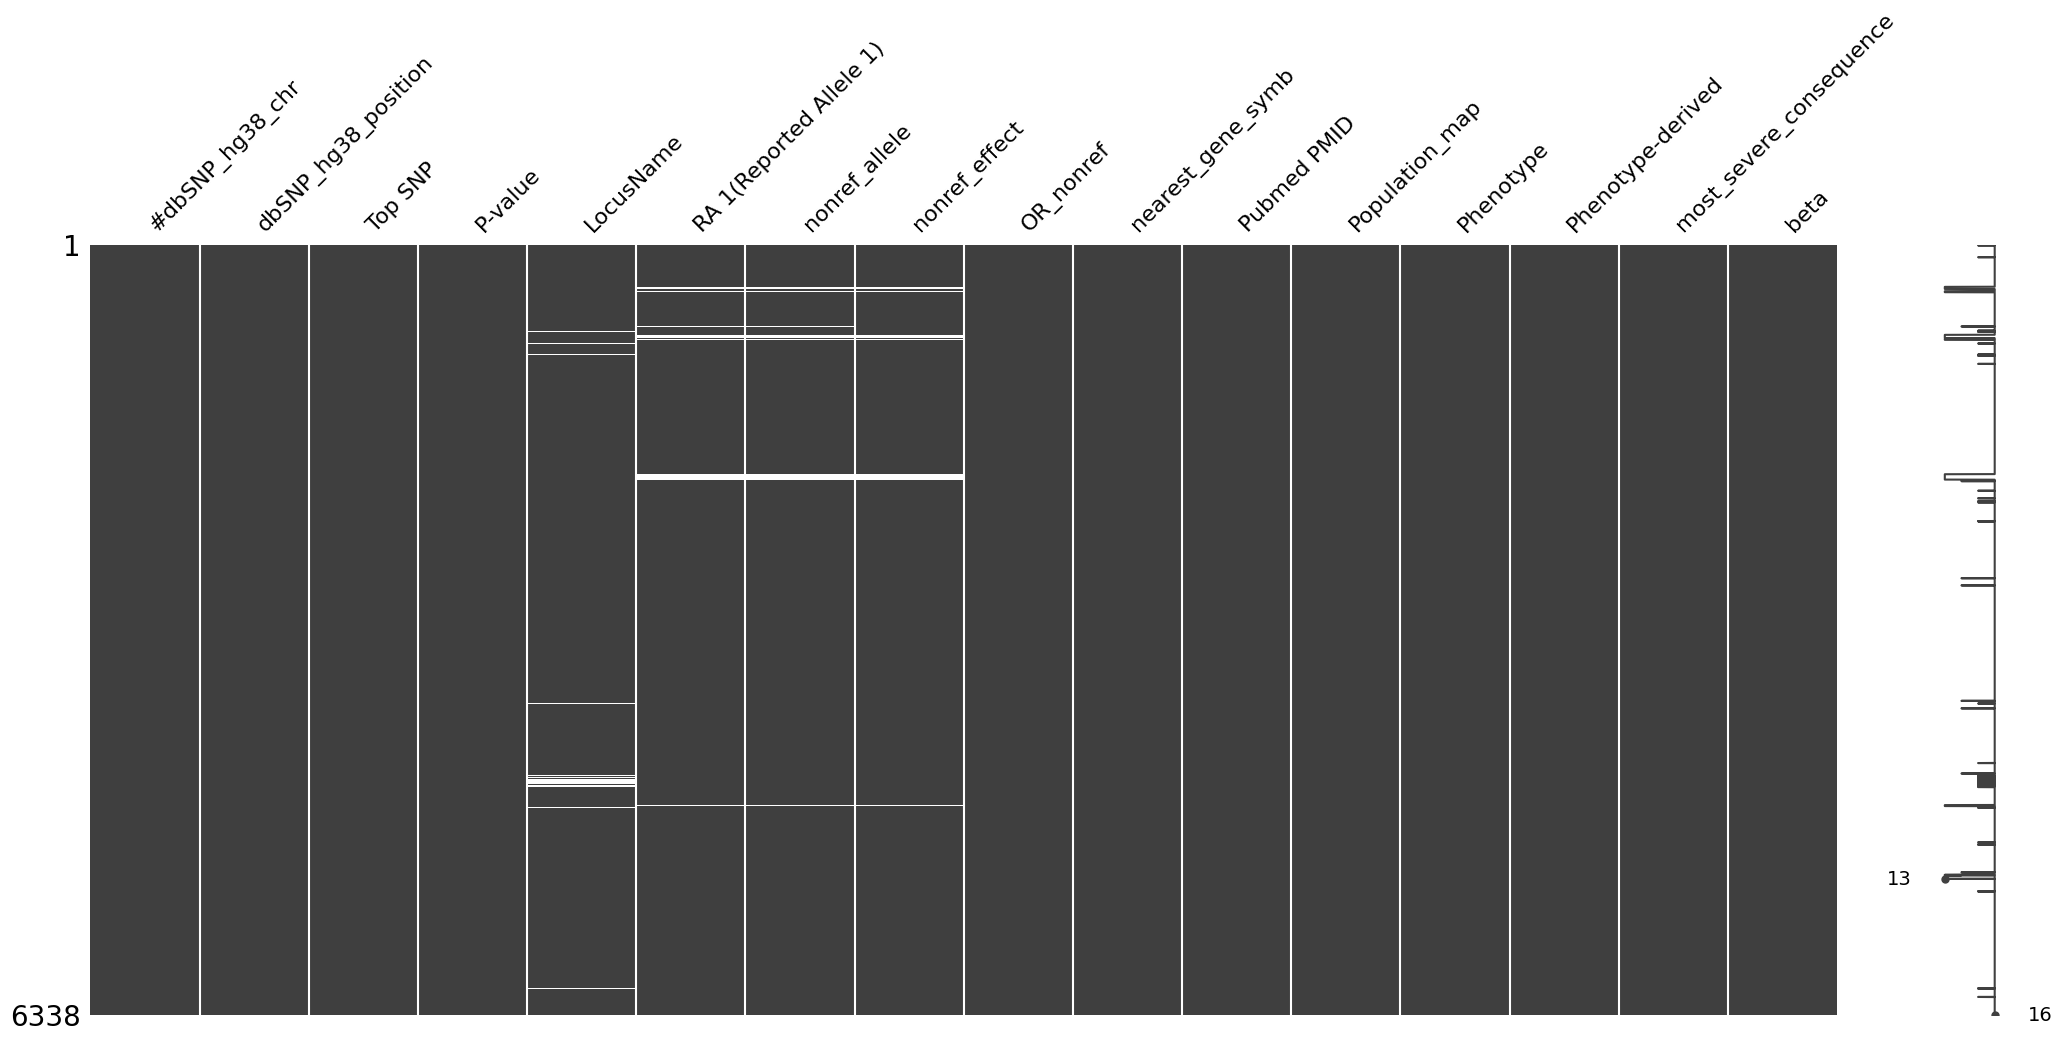

In [ ]:
import missingno as msno
msno.matrix(df)


In [ ]:
df = df.dropna()

In [ ]:
df.head()

#dbSNP_hg38_chr  dbSNP_hg38_position      Top SNP   P-value LocusName  \
0            chr1              6434683   rs12074379   0.00726      ESPN   
1            chr1              6434683   rs12074379  8.51E-40        NR   
2            chr1              8708071  rs112053331    0.0009      RERE   
4            chr1             11487007    rs2379135    0.0156    PTCHD2   
5            chr1             11796321    rs1801133     0.832     MTHFR   

  RA 1(Reported Allele 1) nonref_allele nonref_effect  OR_nonref  \
0                       T             T            NR       1.00   
1                       T             T            NR       1.00   
2                      NR            NR            NR       1.00   
4                      NR            NR            NR       1.00   
5                       A             A          0.98       0.98   

  nearest_gene_symb  Pubmed PMID Population_map  \
0              ESPN     30636644      Caucasian   
1              ESPN     30636644      Caucasian   
2              RERE     30010129      Caucasian   
4             DISP3     22245343      Caucasian   
5             MTHFR     20534741      Caucasian   

                        Phenotype Phenotype-derived most_severe_consequence  \
0                              AD                AD          intron_variant   
1  ESPN (ILMN_1806710) expression        Expression          intron_variant   
2                              AD                AD          intron_variant   
4                             MRI           Imaging          intron_variant   
5                              AD                AD        missense_variant   

           beta  
0  1.000000e-08  
1  1.000000e-08  
2  1.000000e-08  
4  1.000000e-08  
5 -2.020270e-02

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# --- 1. PREPARE DATA ---
# Ensure P-value is numeric and transform it to -log10
# (This makes tiny numbers like 1e-40 much easier for the ML model to "see")
df['P-value'] = pd.to_numeric(df['P-value'], errors='coerce')
df['log_p'] = -np.log10(df['P-value'] + 1e-100)
df['beta'] = pd.to_numeric(df['beta'], errors='coerce')

# Define Target
df['target'] = (df['Phenotype'] == 'AD').astype(int)

# --- 2. DEFINE THE PREPROCESSOR ---
# We treat numerical and categorical data differently here
numeric_features = ['beta', 'log_p'] # P-value stays as a number
categorical_features = ['most_severe_consequence', 'nearest_gene_symb']

preprocessor = ColumnTransformer(
    transformers=[
        # Scale numbers so beta and log_p are on the same range
        ('num', StandardScaler(), numeric_features),
        # Only One-Hot Encode the text columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# **RANDOM FOREST**

In [ ]:
# --- 3. CREATE THE ML PIPELINE ---
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# **MODEL**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


df['P-value'] = pd.to_numeric(df['P-value'], errors='coerce')
df['beta'] = pd.to_numeric(df['beta'], errors='coerce')

# replace 0 with the smallest float
df['P-value'] = df['P-value'].replace(0, np.finfo(float).tiny)

# logTransformation
df['log_p'] = -np.log10(df['P-value'])

# Drop rows with infinityand nan
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['log_p', 'beta', 'most_severe_consequence', 'nearest_gene_symb'])

# Define Target: 1 if Alzheimer's (AD)
# (Ensure your column name matches exactly 'Phenotype')
df['target'] = (df['Phenotype'].str.contains('AD', na=False)).astype(int)

#  ENCODE
# Select features
features = ['beta', 'log_p', 'most_severe_consequence', 'nearest_gene_symb']
X = df[features]
y = df['target']

# Define how to handle different column types
numeric_features = ['beta', 'log_p']
categorical_features = ['most_severe_consequence', 'nearest_gene_symb']

#One-Hot Encodes text
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Preprocess then Train
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf_pipeline.fit(X_train, y_train)

#  DECODE
def decode_risk(prob):
    """Translates a decimal probability into a human-readable percentage and risk level."""
    pct = prob * 100
    if pct > 70:
        level = "High Risk"
    elif pct > 35:
        level = "Moderate Risk"
    else:
        level = "Low Risk"
    return f"{pct:.2f}% | {level}"

# Get the probability of having AD (column 1)
test_probabilities = clf_pipeline.predict_proba(X_test)[:, 1]

print("\n--- Model Prediction Results ---")
for i in range(min(5, len(X_test))):
    result = decode_risk(test_probabilities[i])
    print(f"Sample {i+1}: {result}")

# Check model performance
auc = roc_auc_score(y_test, test_probabilities)
print(f"\nModel Confidence Score (AUC): {auc:.4f}")

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



--- Model Prediction Results ---
Sample 1: 73.00% | High Risk
Sample 2: 66.00% | Moderate Risk
Sample 3: 73.00% | High Risk
Sample 4: 3.00% | Low Risk
Sample 5: 18.00% | Low Risk

Model Confidence Score (AUC): 0.9244


# **COMBINED RESULTS**

In [ ]:
genetic_probs = clf_pipeline.predict_proba(X_test)[:, 1]
genetic_preds = clf_pipeline.predict(X_test)

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
genetic_auc = roc_auc_score(y_test, genetic_probs)
genetic_acc = accuracy_score(y_test, genetic_preds)
genetic_f1  = f1_score(y_test, genetic_preds, average="macro")

print("\n Genetic Model Test Results:")
print(f"Accuracy : {genetic_acc:.4f}")
print(f"Macro-F1 : {genetic_f1:.4f} ")
print(f"AUC      : {genetic_auc:.4f} ")



 Genetic Model Test Results:
Accuracy : 0.8483
Macro-F1 : 0.8467 
AUC      : 0.9244 


In [ ]:
print("\nAlzheimer Fusion Insights (MRI + Genetics)")

for i in range(10):
    mri_pred  = list(label_map.keys())[test_preds[i]]
    mri_conf  = np.max(test_probs[i]) * 100
    gene_risk = decode_risk(genetic_probs[i])

    print(f"\nSample {i+1}")
    print(f"MRI Prediction : {mri_pred}")
    print(f"MRI Confidence : {mri_conf:.2f}%")
    print(f"Genetic Risk   : {gene_risk} ")



Alzheimer Fusion Insights (MRI + Genetics)

Sample 1
MRI Prediction : VeryMildDemented
MRI Confidence : 92.53%
Genetic Risk   : 73.00% | High Risk 

Sample 2
MRI Prediction : VeryMildDemented
MRI Confidence : 92.64%
Genetic Risk   : 66.00% | Moderate Risk 

Sample 3
MRI Prediction : ModerateDemented
MRI Confidence : 92.35%
Genetic Risk   : 73.00% | High Risk 

Sample 4
MRI Prediction : NonDemented
MRI Confidence : 92.92%
Genetic Risk   : 3.00% | Low Risk 

Sample 5
MRI Prediction : ModerateDemented
MRI Confidence : 92.63%
Genetic Risk   : 18.00% | Low Risk 

Sample 6
MRI Prediction : ModerateDemented
MRI Confidence : 92.65%
Genetic Risk   : 96.00% | High Risk 

Sample 7
MRI Prediction : NonDemented
MRI Confidence : 92.75%
Genetic Risk   : 25.00% | Low Risk 

Sample 8
MRI Prediction : NonDemented
MRI Confidence : 92.71%
Genetic Risk   : 99.00% | High Risk 

Sample 9
MRI Prediction : NonDemented
MRI Confidence : 92.80%
Genetic Risk   : 0.00% | Low Risk 

Sample 10
MRI Prediction : NonDe

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Alzheimer Fusion Insights (MRI + Genetics + Grad-CAM)


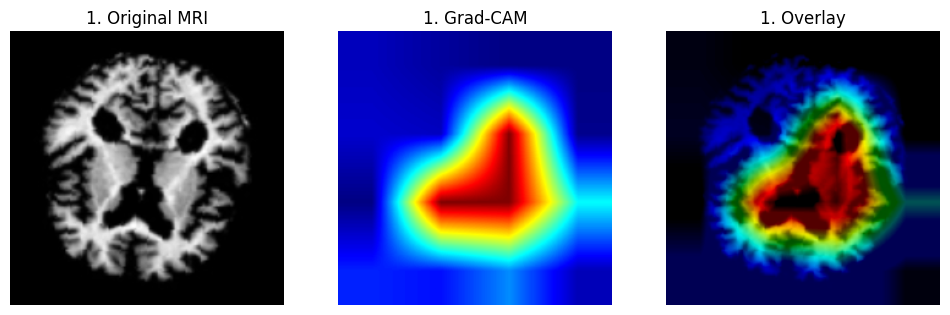

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 1
 MRI Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/ModerateDemented/c08fd03e-5957-402b-b654-0cf462f38bce.jpg
 True Label     : ModerateDemented
 Predicted MRI  : ModerateDemented
 MRI Confidence : 92.91%


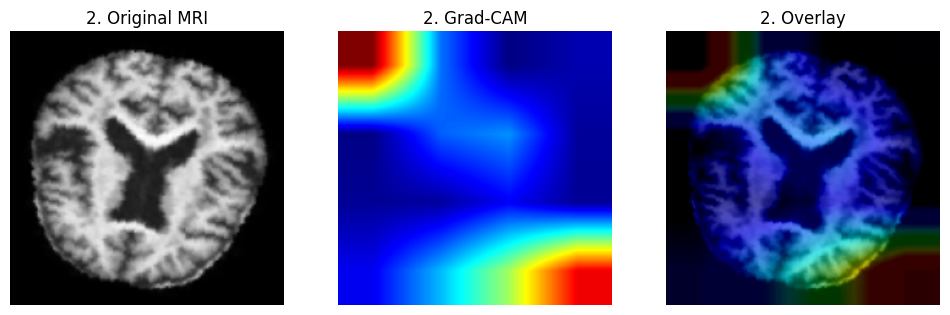

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 2
 MRI Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/afbf6a24-1282-43ab-80eb-bce3c079016d.jpg
 True Label     : MildDemented
 Predicted MRI  : MildDemented
 MRI Confidence : 93.01%


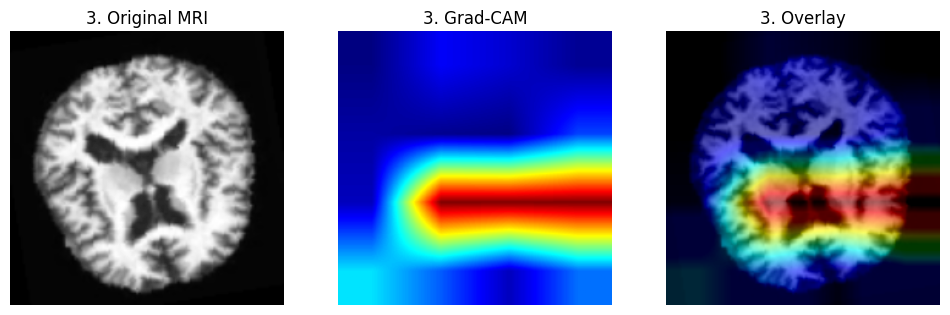

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 3
 MRI Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/ModerateDemented/aug_8320_abc4310c-8997-4628-948e-9cc4ecc5d5ac.jpg
 True Label     : ModerateDemented
 Predicted MRI  : ModerateDemented
 MRI Confidence : 92.51%


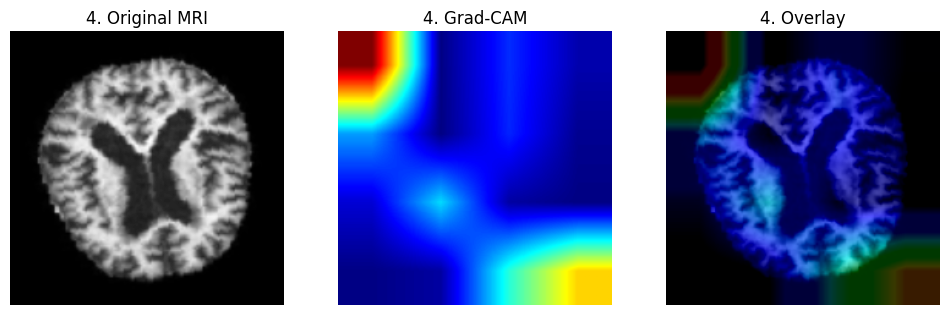

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 4
 MRI Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/95b5905a-f2ec-4e38-bd76-5b4e9c56a737.jpg
 True Label     : MildDemented
 Predicted MRI  : MildDemented
 MRI Confidence : 93.21%


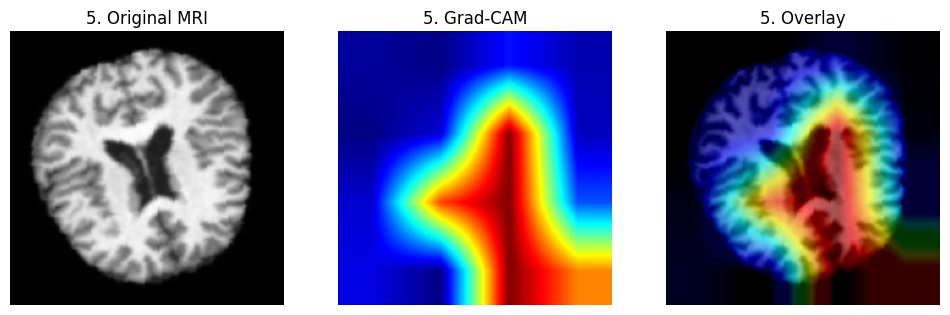

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 5
 MRI Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/NonDemented/c4f486fe-78d4-4b5f-9946-a0188e470959.jpg
 True Label     : NonDemented
 Predicted MRI  : NonDemented
 MRI Confidence : 92.46%


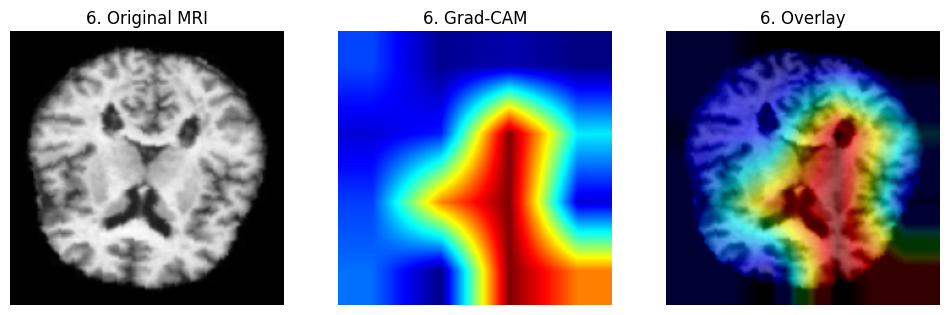

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 6
 MRI Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented/7674c44c-88db-455f-8dc1-931fc517a412.jpg
 True Label     : NonDemented
 Predicted MRI  : NonDemented
 MRI Confidence : 92.75%


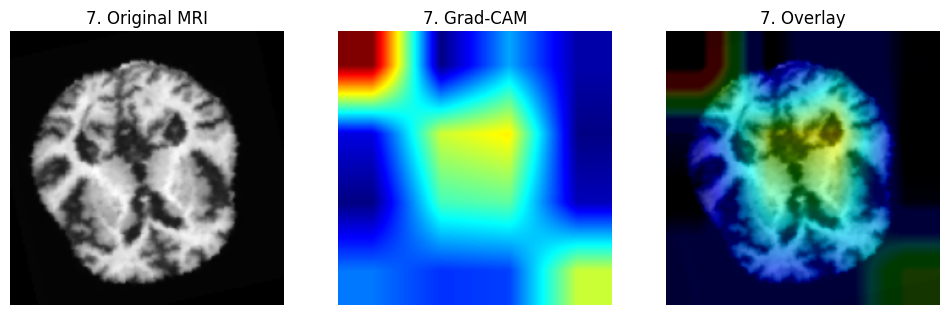

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 7
 MRI Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/74039db1-54ec-424b-9c53-9b99a0ae3dab.jpg
 True Label     : MildDemented
 Predicted MRI  : MildDemented
 MRI Confidence : 90.73%


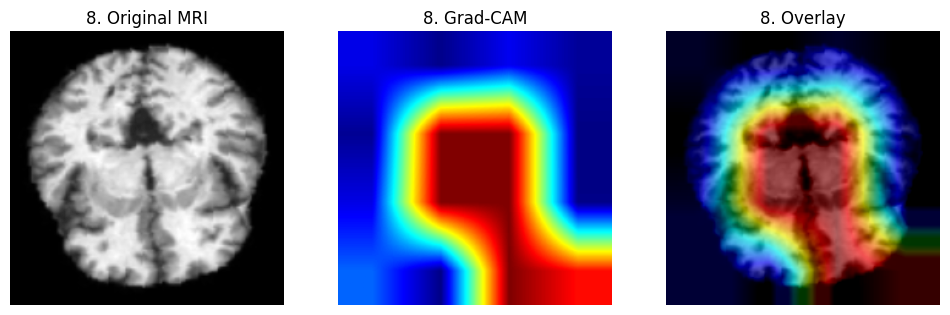

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 8
 MRI Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/NonDemented/b867ec0c-9bd4-4b2d-ae58-dad383185f57.jpg
 True Label     : NonDemented
 Predicted MRI  : NonDemented
 MRI Confidence : 92.96%


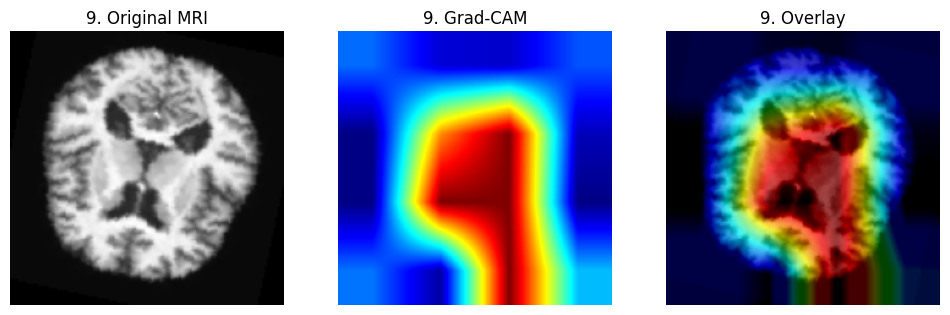

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Sample 9
 MRI Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented/65baec8f-5464-4684-ba16-1c69088d41e9.jpg
 True Label     : NonDemented
 Predicted MRI  : NonDemented
 MRI Confidence : 93.05%


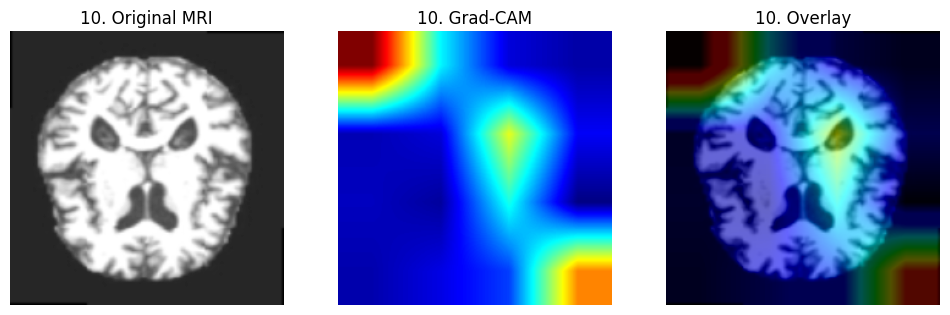


Sample 10
 MRI Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/VeryMildDemented/6f4c139d-46ff-4c36-87af-5e1a385f271f.jpg
 True Label     : VeryMildDemented
 Predicted MRI  : VeryMildDemented
 MRI Confidence : 93.14%


In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

print("\nAlzheimer Fusion Insights (MRI + Genetics + Grad-CAM)")

for i, idx in enumerate(idxs):
    img_tensor, true = test_ds[idx]
    cam, pred, conf = generate_gradcam(model, img_tensor)

    # ---- FIX: resize CAM before heatmap conversion ----
    cam = cv2.resize(cam, (224, 224))

    orig = img_tensor.squeeze().cpu().numpy()
    orig = cv2.resize(orig, (224, 224))

    cam_hm = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    cam_hm = np.float32(cam_hm) / 255

    orig3 = np.stack([orig, orig, orig], axis=-1)

    # ---- FIX: now compute overlay using correct sizes ----
    overlay = 0.6 * cam_hm + 0.4 * orig3
    overlay = overlay / overlay.max()


    # ---- display 3-column image row ----
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(orig, cmap="gray"); ax[0].set_title(f"{i+1}. Original MRI")
    ax[1].imshow(cam_hm); ax[1].set_title(f"{i+1}. Grad-CAM")
    ax[2].imshow(overlay); ax[2].set_title(f"{i+1}. Overlay")
    for a in ax: a.axis("off")
    plt.show()

    # ---- print fusion metrics ----
    print(f"\nSample {i+1}")
    print(f" MRI Path       : {test_df.iloc[idx]['image_path']}")
    print(f" True Label     : {test_df.iloc[idx]['label']}")
    print(f" Predicted MRI  : {list(label_map.keys())[pred]}")
    print(f" MRI Confidence : {conf*100:.2f}%")

